# Data Cleaning
## Credit Card Fraud Detection

This notebook handles data cleaning including duplicate removal and data quality checks before preprocessing.


In [1]:
# Import necessary libraries
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Add src to path
sys.path.append(str(Path('..')))
from src.data_loader import DataLoader

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline


## 1. Load Data


In [ ]:
# Initialize data loader
data_loader = DataLoader(data_dir='../data')

# Verify file path
csv_path = Path('../data/creditcard.csv')
print(f"Loading data from: {csv_path.absolute()}")
print(f"File exists: {csv_path.exists()}")

# Load CSV data
df = data_loader.load_csv_data('creditcard.csv')

print(f"\nOriginal dataset shape: {df.shape}")
print(f"Total rows: {len(df):,}")
print(f"Total columns: {len(df.columns)}")


: 

## 2. Check for Duplicates


In [3]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count:,}")
print(f"Percentage of duplicates: {(duplicate_count/len(df)*100):.2f}%")

# Show duplicate rows if any
if duplicate_count > 0:
    print("\nSample duplicate rows:")
    duplicate_rows = df[df.duplicated(keep=False)]
    print(f"Total rows involved in duplicates: {len(duplicate_rows):,}")
    print("\nFirst few duplicate rows:")
    print(duplicate_rows.head(10))


Number of duplicate rows: 1,081
Percentage of duplicates: 0.38%

Sample duplicate rows:
Total rows involved in duplicates: 1,854

First few duplicate rows:
      Time        V1        V2        V3        V4        V5        V6  \
32    26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
33    26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
34    26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
35    26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
112   74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
113   74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
114   74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
115   74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
220  145.0 -2.420413  1.947885  0.553646  0.983069 -0.281518  2.408958   
221  145.0 -2.420413  1.947885  0.553646  0.983069 -0.281518  2.408958   

           V7        V8      

## 3. Remove Duplicates


In [6]:
# Remove duplicate rows (keep first occurrence)
df_clean = df.drop_duplicates(keep='first')

print(f"After removing duplicates:")
print(f"  Original rows: {len(df):,}")
print(f"  Duplicate rows removed: {duplicate_count:,}")
print(f"  Cleaned rows: {len(df_clean):,}")
print(f"  Rows removed: {len(df) - len(df_clean):,}")

# Check class distribution after cleaning
print(f"\nClass distribution after cleaning:")
print(f"  Normal (0): {df_clean['Class'].value_counts()[0]:,} ({df_clean['Class'].value_counts(normalize=True)[0]*100:.2f}%)")
print(f"  Fraud (1):  {df_clean['Class'].value_counts()[1]:,} ({df_clean['Class'].value_counts(normalize=True)[1]*100:.2f}%)")


After removing duplicates:
  Original rows: 284,807
  Duplicate rows removed: 1,081
  Cleaned rows: 283,726
  Rows removed: 1,081

Class distribution after cleaning:
  Normal (0): 283,253 (99.83%)
  Fraud (1):  473 (0.17%)


## 4. Check for Missing Values


In [7]:
# Check for missing values
missing_values = df_clean.isnull().sum()
missing_percent = (missing_values / len(df_clean)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percent
})

# Show columns with missing values
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    print("Columns with missing values:")
    print(missing_df)
else:
    print("✓ No missing values found in the dataset!")


✓ No missing values found in the dataset!


## 5. Check Data Types


In [8]:
# Check data types
print("Data Types:")
print("="*50)
print(df_clean.dtypes)

# Check for any unexpected data types
print("\n" + "="*50)
print("Data Type Summary:")
print(f"  Numeric columns: {len(df_clean.select_dtypes(include=[np.number]).columns)}")
print(f"  Object columns: {len(df_clean.select_dtypes(include=['object']).columns)}")
print(f"  Boolean columns: {len(df_clean.select_dtypes(include=['bool']).columns)}")


Data Types:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Data Type Summary:
  Numeric columns: 31
  Object columns: 0
  Boolean columns: 0


## 6. Check for Outliers and Anomalies


In [9]:
# Check for negative amounts (shouldn't exist for credit card transactions)
negative_amounts = (df_clean['Amount'] < 0).sum()
print(f"Negative amounts: {negative_amounts}")

# Check for zero amounts
zero_amounts = (df_clean['Amount'] == 0).sum()
print(f"Zero amounts: {zero_amounts}")

# Check for invalid Class values (should only be 0 or 1)
invalid_class = df_clean[~df_clean['Class'].isin([0, 1])]
print(f"Invalid Class values: {len(invalid_class)}")

# Check for negative Time values
negative_time = (df_clean['Time'] < 0).sum()
print(f"Negative Time values: {negative_time}")


Negative amounts: 0
Zero amounts: 1808
Invalid Class values: 0
Negative Time values: 0


## 7. Visualize Data Quality


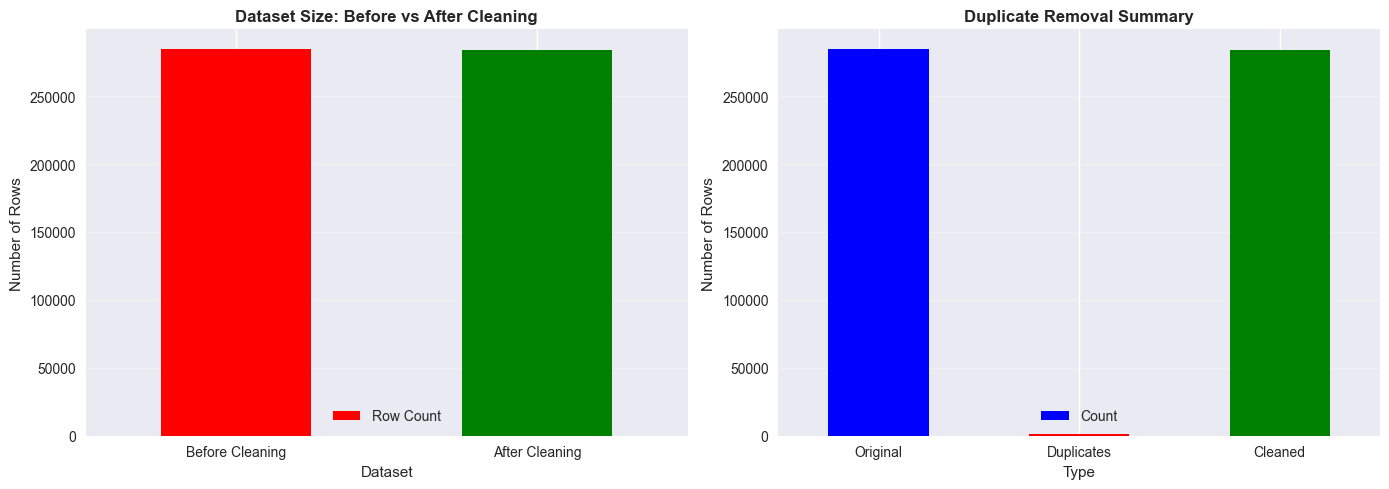

In [10]:
# Create visualization of data cleaning results
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Before and after row count
before_after = pd.DataFrame({
    'Dataset': ['Before Cleaning', 'After Cleaning'],
    'Row Count': [len(df), len(df_clean)]
})

before_after.plot(x='Dataset', y='Row Count', kind='bar', ax=axes[0], color=['red', 'green'])
axes[0].set_title('Dataset Size: Before vs After Cleaning', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Number of Rows')
axes[0].set_xticklabels(before_after['Dataset'], rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Duplicate information
if duplicate_count > 0:
    duplicate_info = pd.DataFrame({
        'Type': ['Original', 'Duplicates', 'Cleaned'],
        'Count': [len(df), duplicate_count, len(df_clean)]
    })
    duplicate_info.plot(x='Type', y='Count', kind='bar', ax=axes[1], color=['blue', 'red', 'green'])
    axes[1].set_title('Duplicate Removal Summary', fontsize=12, fontweight='bold')
    axes[1].set_ylabel('Number of Rows')
    axes[1].set_xticklabels(duplicate_info['Type'], rotation=0)
    axes[1].grid(axis='y', alpha=0.3)
else:
    axes[1].text(0.5, 0.5, 'No Duplicates Found', 
                ha='center', va='center', fontsize=14, fontweight='bold')
    axes[1].set_title('Duplicate Removal Summary', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


## 8. Save Cleaned Data


In [11]:
# Save cleaned data
cleaned_data_path = Path('../data/creditcard_cleaned.csv')
df_clean.to_csv(cleaned_data_path, index=False)

print(f"Cleaned data saved to: {cleaned_data_path.absolute()}")
print(f"File size: {cleaned_data_path.stat().st_size / (1024*1024):.2f} MB")
print(f"\nCleaned dataset summary:")
print(f"  Rows: {len(df_clean):,}")
print(f"  Columns: {len(df_clean.columns)}")
print(f"  Memory usage: {df_clean.memory_usage(deep=True).sum() / (1024*1024):.2f} MB")


Cleaned data saved to: d:\h\Financial Fraud Detection-AI\transactions\notebooks\..\data\creditcard_cleaned.csv
File size: 143.56 MB

Cleaned dataset summary:
  Rows: 283,726
  Columns: 31
  Memory usage: 69.27 MB


## 9. Summary


In [12]:
print("="*70)
print("DATA CLEANING SUMMARY")
print("="*70)
print(f"\n1. Original Dataset:")
print(f"   - Total rows: {len(df):,}")
print(f"   - Total columns: {len(df.columns)}")
print(f"\n2. Data Quality Issues Found:")
print(f"   - Duplicate rows: {duplicate_count:,} ({(duplicate_count/len(df)*100):.2f}%)")
print(f"   - Missing values: {df_clean.isnull().sum().sum()}")
print(f"   - Negative amounts: {(df_clean['Amount'] < 0).sum()}")
print(f"   - Invalid Class values: {len(df_clean[~df_clean['Class'].isin([0, 1])])}")
print(f"\n3. Cleaning Actions Taken:")
print(f"   - Removed {duplicate_count:,} duplicate rows")
if df_clean.isnull().sum().sum() > 0:
    print(f"   - Handled missing values")
print(f"\n4. Cleaned Dataset:")
print(f"   - Total rows: {len(df_clean):,}")
print(f"   - Rows removed: {len(df) - len(df_clean):,}")
print(f"   - Data reduction: {((len(df) - len(df_clean))/len(df)*100):.2f}%")
print(f"\n5. Output:")
print(f"   - Cleaned data saved to: creditcard_cleaned.csv")
print(f"   - Ready for preprocessing in next notebook")
print("="*70)


DATA CLEANING SUMMARY

1. Original Dataset:
   - Total rows: 284,807
   - Total columns: 31

2. Data Quality Issues Found:
   - Duplicate rows: 1,081 (0.38%)
   - Missing values: 0
   - Negative amounts: 0
   - Invalid Class values: 0

3. Cleaning Actions Taken:
   - Removed 1,081 duplicate rows

4. Cleaned Dataset:
   - Total rows: 283,726
   - Rows removed: 1,081
   - Data reduction: 0.38%

5. Output:
   - Cleaned data saved to: creditcard_cleaned.csv
   - Ready for preprocessing in next notebook
